In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dfCompanyA = pd.read_excel('asmi_pilots_analysis.xlsx','companyA')
dfCompanyB = pd.read_excel('asmi_pilots_analysis.xlsx','companyB')
dfCompanyC = pd.read_excel('asmi_pilots_analysis.xlsx','companyC')
dfCompanyD = pd.read_excel('asmi_pilots_analysis.xlsx','companyD')
dfCompanyE = pd.read_excel('asmi_pilots_analysis.xlsx','companyE')
dfCompanyF = pd.read_excel('asmi_pilots_analysis.xlsx','companyF')
dfCompanyG = pd.read_excel('asmi_pilots_analysis.xlsx','companyG')
dfCompanyH = pd.read_excel('asmi_pilots_analysis.xlsx','companyH')

### Average Dimension Score base on dimension

In [3]:
AllComp = [dfCompanyA, dfCompanyB,dfCompanyC,dfCompanyD,dfCompanyE, dfCompanyF,dfCompanyG,dfCompanyH]

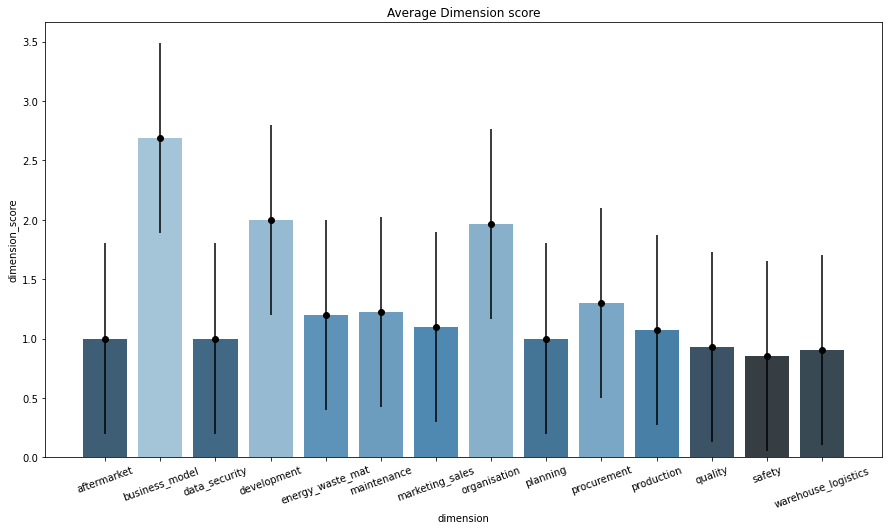

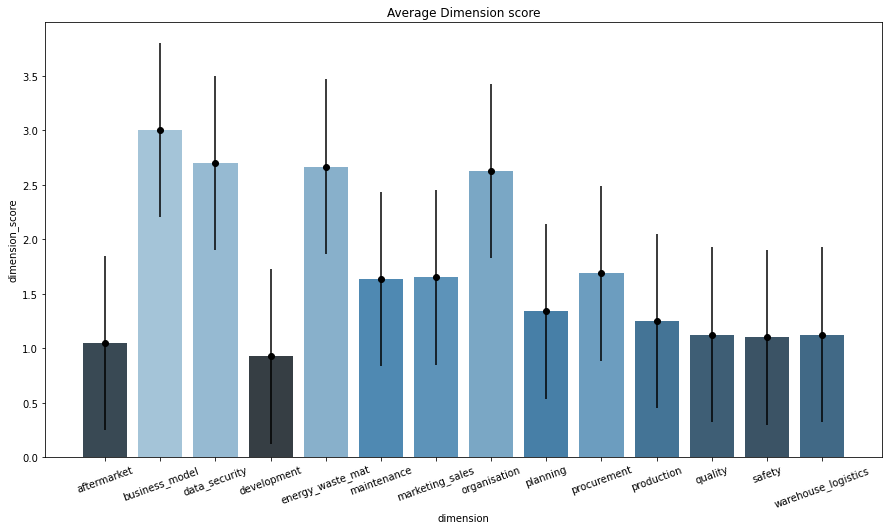

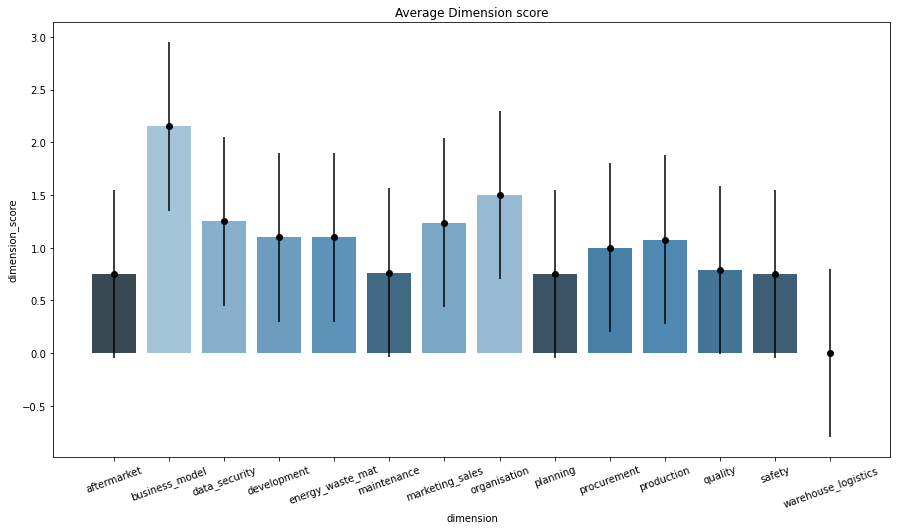

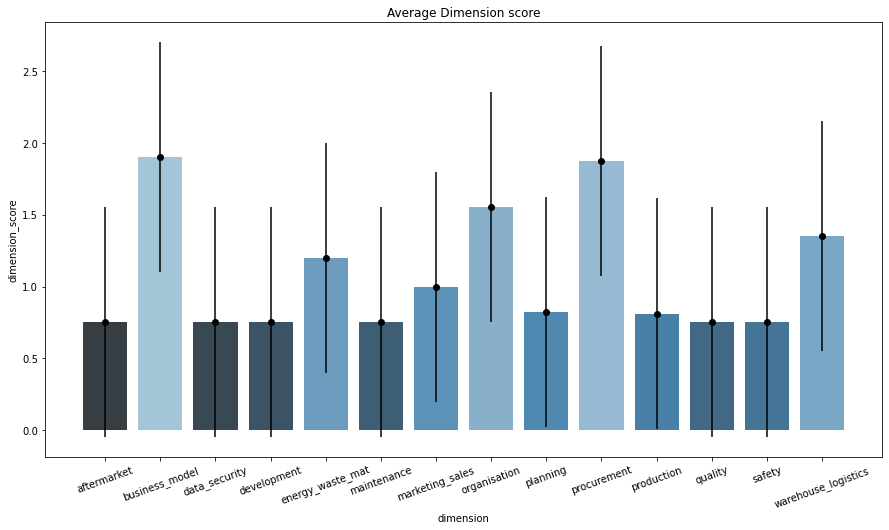

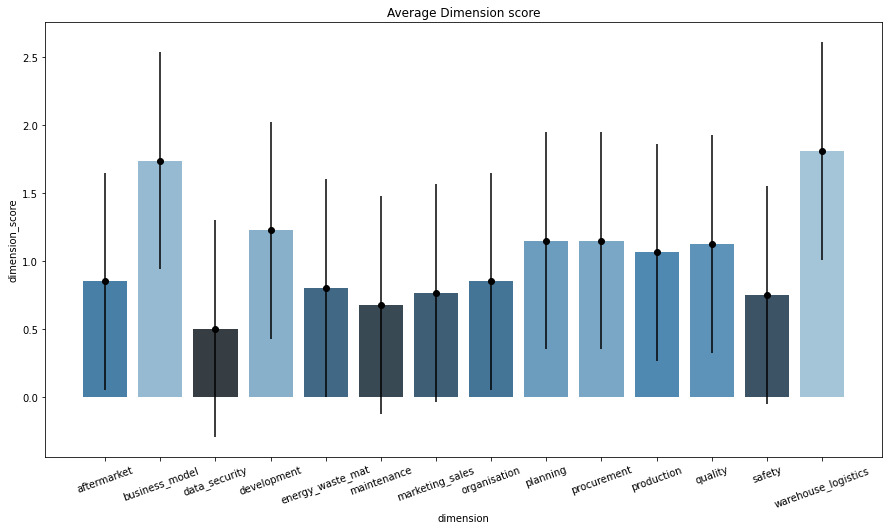

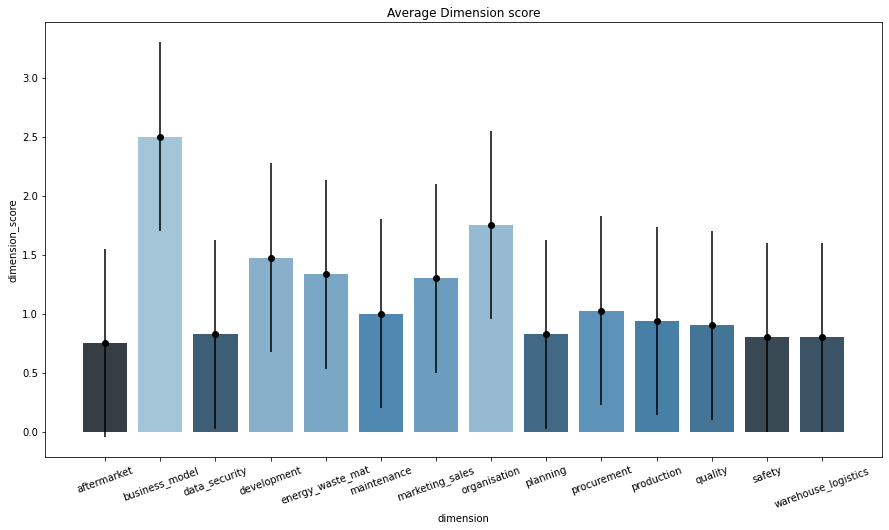

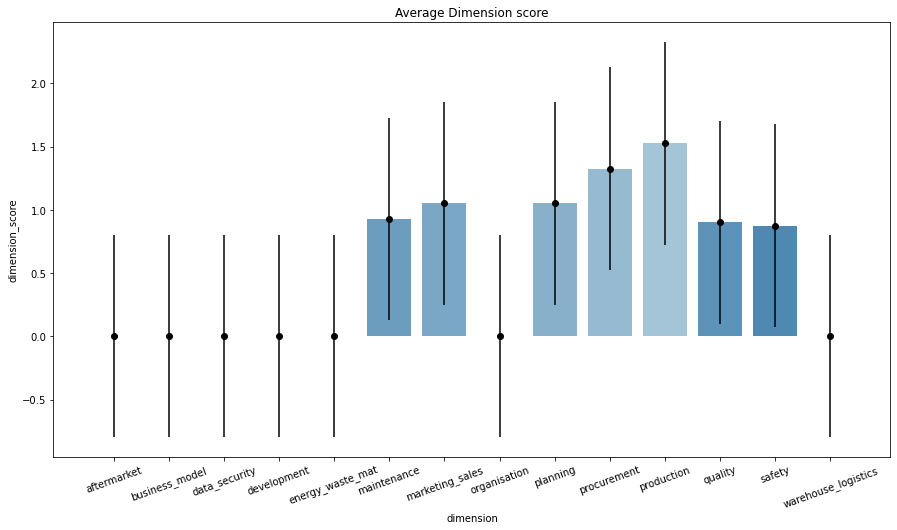

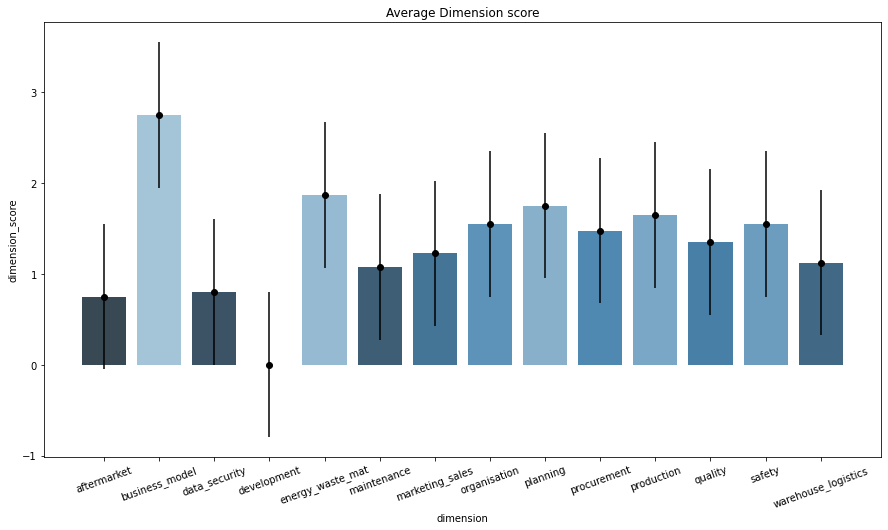

In [19]:
for comp in AllComp:
    plt.figure(figsize = (15,8))
    data = comp.groupby('dimension')['dimension_score'].mean()
    pal = sns.color_palette("Blues_d", len(data))
    rank = data.argsort().argsort()
    sns.barplot(x = data.index, y = data, palette=np.array(pal[::-1])[rank]).set(title='Average Dimension score')
    
    plt.errorbar(data.index, data, yerr=0.8, fmt='o',color='black')
    
    plt.xticks(rotation=20)
    plt.show()

### Average Element Score base on Element

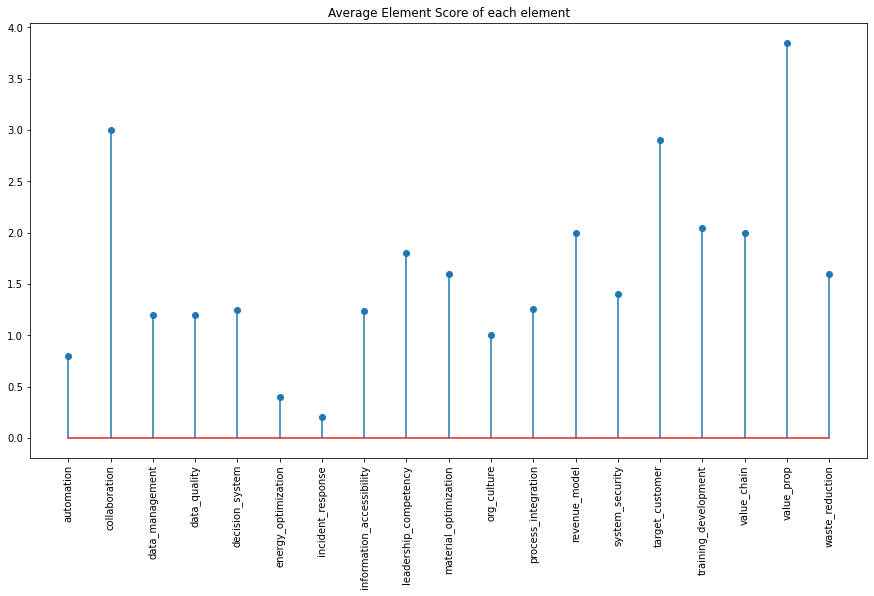

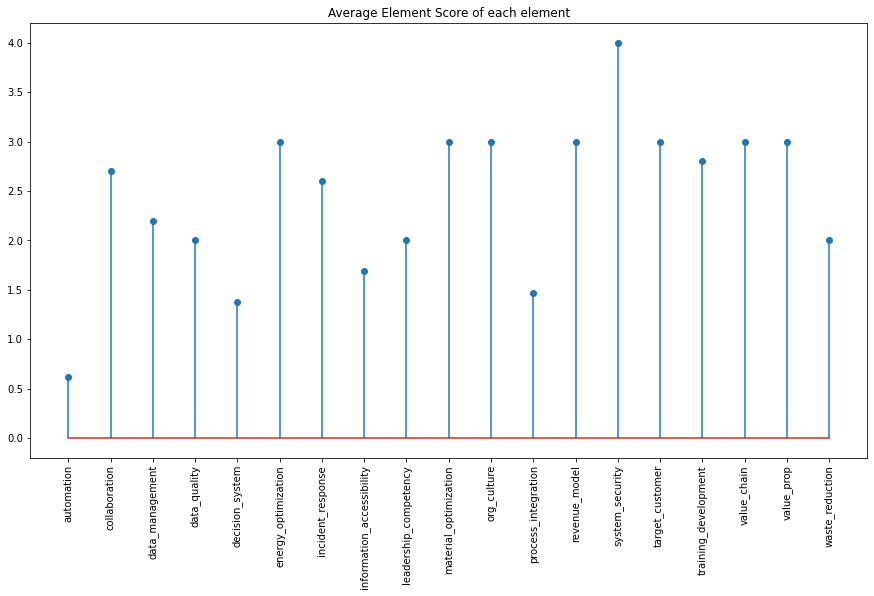

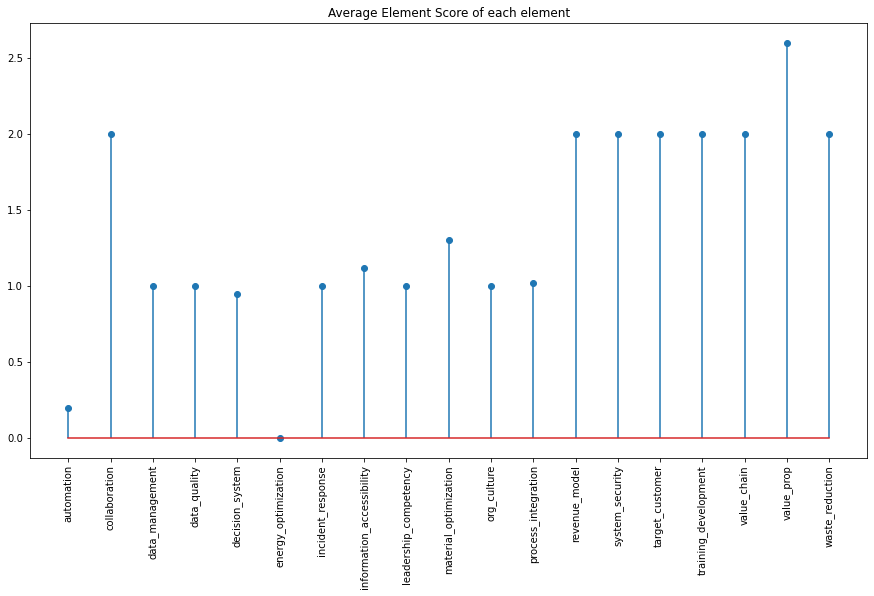

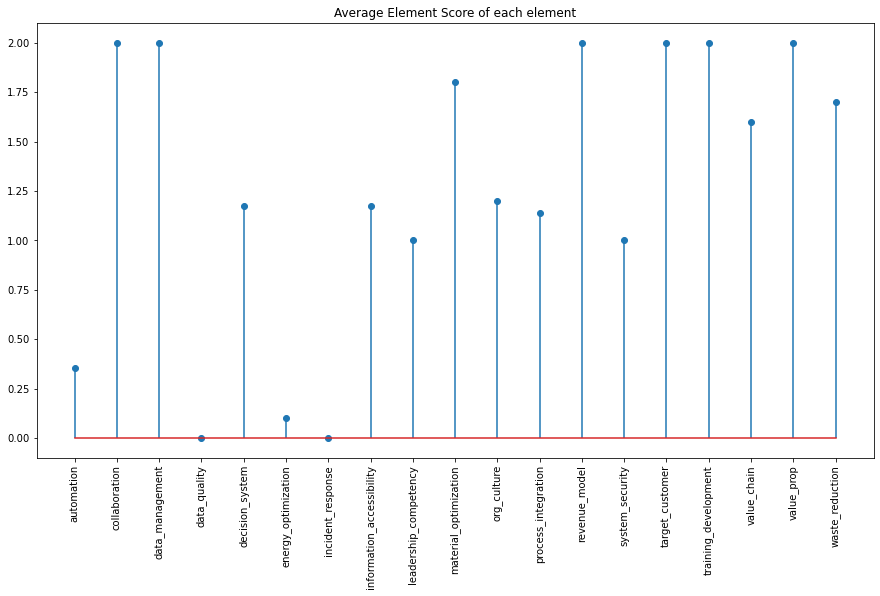

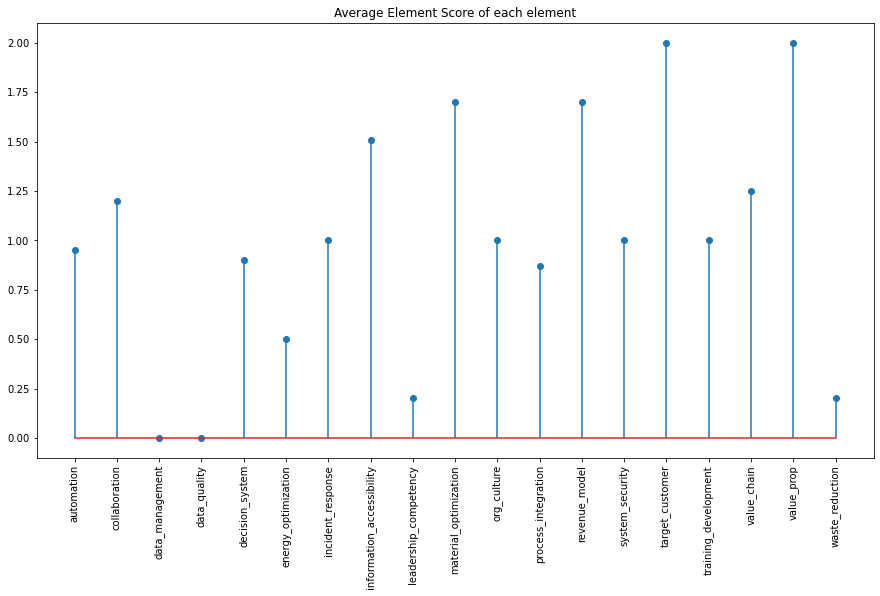

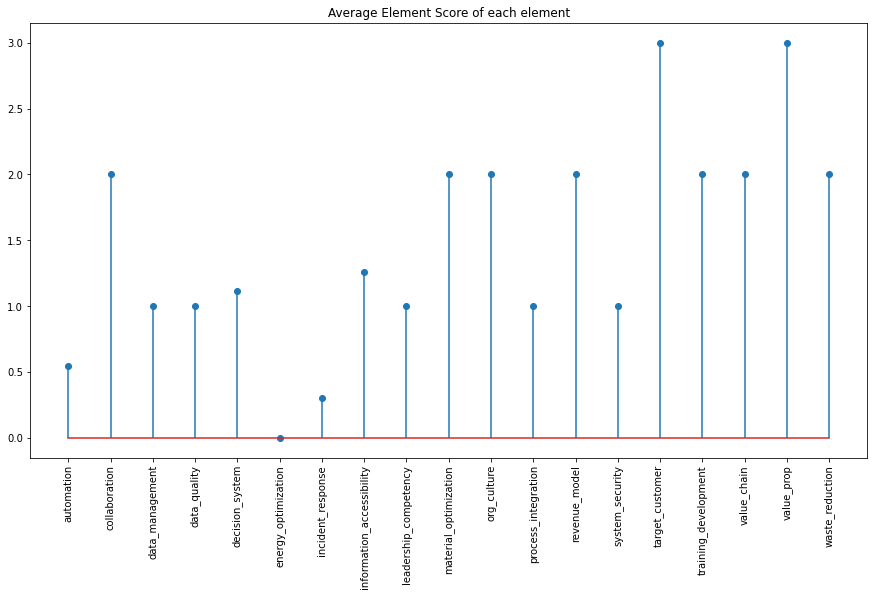

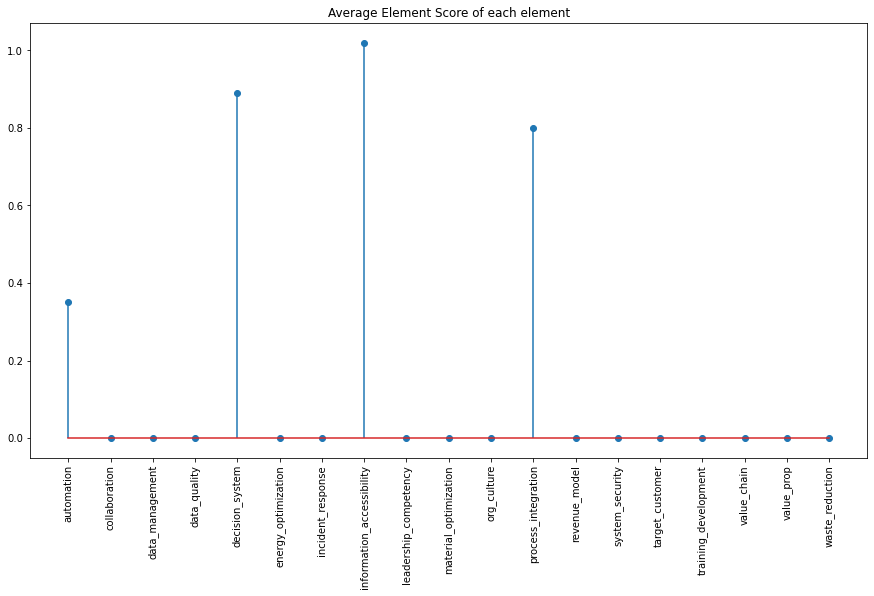

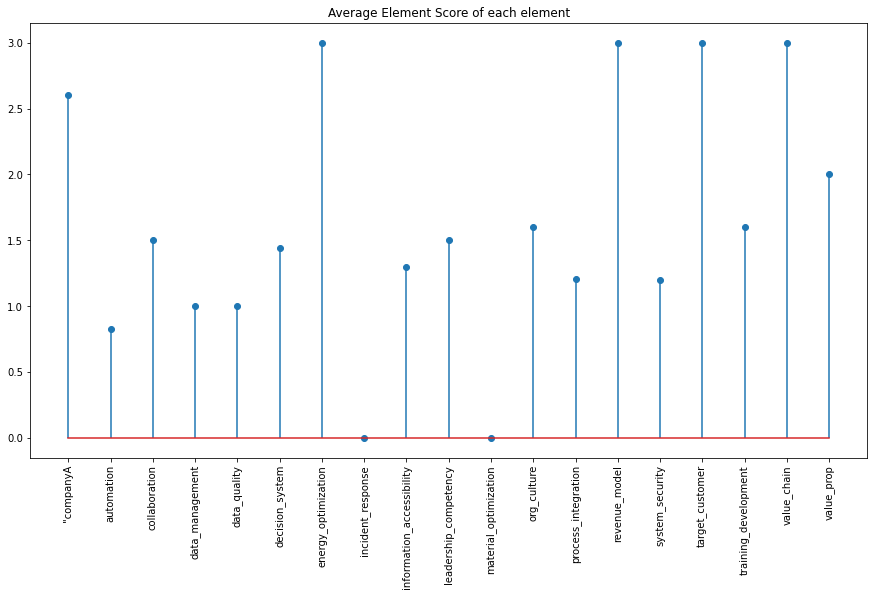

In [5]:
for comp in AllComp:
    plt.figure(figsize = (15,8))
    data = comp.groupby('element')['element_score'].mean()
    pal = sns.color_palette("Blues_d", len(data))
    rank = data.argsort().argsort()
    plt.stem(data.index, data)
    plt.xticks(rotation=90)
    plt.title("Average Element Score of each element")
    plt.show()

### Average Dimension Score of each Company

In [6]:
Averages = []
Sum = []
for comp in AllComp:
    Mean = np.mean(comp['dimension_score'])
    SumC = sum(comp['dimension_score'])
    Averages.append(Mean)
    Sum.append(SumC)
    

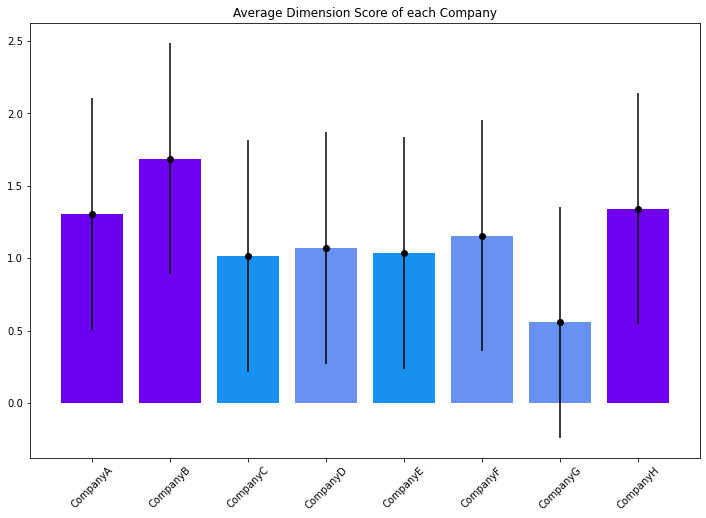

In [16]:
AllCompName = ['CompanyA', 'CompanyB','CompanyC','CompanyD','CompanyE', 'CompanyF','CompanyG','CompanyH']
plt.figure(figsize= (12,8))
colors = ['#6900F0', '#7000F0','#1890F0','#6890F0','#1890F0', '#6890F0', '#6890F0', '#7000F0']
plt.bar(AllCompName, Averages,color=colors)
plt.errorbar(AllCompName, Averages, yerr=0.8, fmt='o',color='black')
plt.xticks(rotation=45)
plt.title("Average Dimension Score of each Company")
plt.show()

### Total Dimension Score of each Company

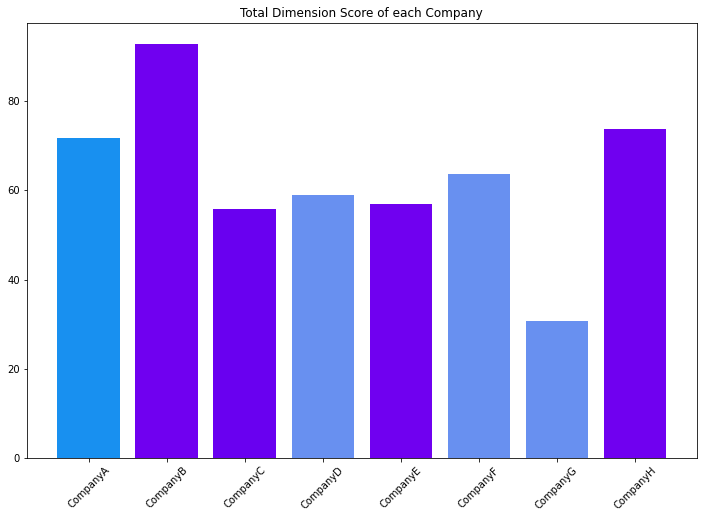

In [18]:
plt.figure(figsize= (12,8))
colors = ['#1890F0', '#7000F0', '#6900F0','#6890F0','#7000F0', '#6890F0', '#6890F0', '#7000F0']
plt.bar(AllCompName, Sum, color = colors)

plt.xticks(rotation=45)
plt.title("Total Dimension Score of each Company")
plt.show()

In [221]:
Level = ['level_0', 'level_1', 'level_2', 'level_3','level_4']

In [231]:
len(AllComp)

8

In [237]:
DictLevel = {}
for i, comp in enumerate(AllComp):
    Level0Mean = np.mean(comp['level_0'])
    Level1Mean = np.mean(comp['level_1'])
    Level2Mean = np.mean(comp['level_2'])
    Level3Mean = np.mean(comp['level_3'])
    Level4Mean = np.mean(comp['level_4'])
    DictLevel[i] = [Level0Mean, Level1Mean,Level2Mean,Level3Mean,Level4Mean]


In [238]:
DictLevel

{0: [8.181818181818182,
  60.36363636363637,
  26.09090909090909,
  3.6363636363636362,
  1.7272727272727273],
 1: [7.545454545454546,
  37.0,
  36.36363636363637,
  17.272727272727273,
  1.8181818181818181],
 2: [14.545454545454545, 56.09090909090909, 21.0, 1.0909090909090908, 0.0],
 3: [18.818181818181817, 55.36363636363637, 25.818181818181817, 0.0, 0.0],
 4: [21.636363636363637,
  62.10909090909091,
  16.618181818181817,
  0.09090909090909091,
  2.0],
 5: [12.727272727272727, 62.63636363636363, 21.0, 3.6363636363636362, 0.0],
 6: [14.909090909090908, 31.09090909090909, 12.0, 0.18181818181818182, 0.0],
 7: [7.454545454545454,
  45.27272727272727,
  31.09090909090909,
  8.909090909090908,
  0.0]}

In [239]:
d1 = {0:'CompanyA', 1:'CompanyB', 2:'CompanyC', 3:'CompanyD', 4: 'CompanyE', 5:'CompanyF', 6:'CompanyG', 7:'CompanyH'}
DictLevel = dict((d1[key], value) for (key, value) in DictLevel.items())

C:\Users\User\AppData\Local\Temp\ipykernel_2088\3428107108.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(keys)


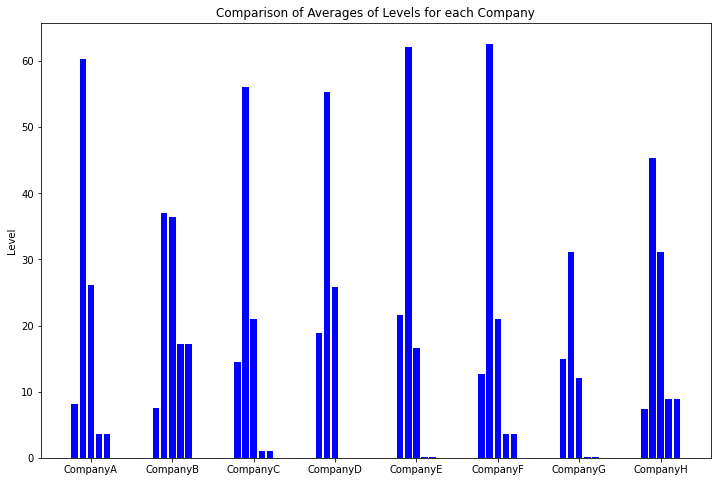

In [240]:
keys = [key for key in DictLevel.keys()]
values = [value for value in DictLevel.values()]
fig, ax = plt.subplots(figsize = (12,8))

ax.bar(np.arange(len(keys)) -0.2, [value[0] for value in values],0.08, color='b', align='center')

ax.bar(np.arange(len(keys)) -0.1,[value[1] if len(value) >= 2 else 0 for value in values],width=0.08, color='b', align='center')

ax.bar(np.arange(len(keys)) +0,[value[2] if len(value) >= 3 else 0 for value in values],width=0.08, color='b', align='center')

ax.bar(np.arange(len(keys)) +0.1,[value[3] if len(value) >= 4 else 0 for value in values],width=0.08, color='b', align='center')

ax.bar(np.arange(len(keys)) +0.2,[value[3] if len(value) >= 5 else 0 for value in values],width=0.08, color='b', align='center')

ax.set_ylabel("Level")
ax.set_xticklabels(keys)
ax.set_xticks(np.arange(len(keys)))
ax.set_title("Comparison of Averages of Levels for each Company")
plt.show()